***HOMEWORK 03***

* Amrutha Kanakatte Ravishankar
* CWID: 20027346

**TASK: Machine Translation with Seq2Seq Model:**

The goal of HW3 is to get hands-on experience of utilizing Seq2Seq model for machine translation task. It helps to get a deeper understanding of how the input sequence is translated to the output sequence with the Seq2Seq model.The skills that are learnt in this homework will benefit in understanding a wide range of NLP tasks beyond machine translation.

The machine translation here is done from ***English*** to ***German***

In [ ]:
# Install datasets library
!pip install datasets
!pip install transformers
!pip install torchtext
!pip install torch
!pip install tensorflow
!pip install sentencepiece
!pip install sacremoses
!pip install sacrebleu
!pip install ctranslate2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:


In [ ]:
import pandas as pd
from datasets import load_dataset
import random
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
import nltk
from nltk.tokenize import word_tokenize
from nltk.translate import bleu_score

***TASK: Machine Translation***

***1. Data Preparation:***

  **1.1 Data Download and Pre-processing**

In [ ]:
# Download the Flores200 dataset
from datasets import load_dataset
dataset = load_dataset("Muennighoff/flores200", 'all')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.01k [00:00<?, ?B/s]

flores200.py:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

The repository for Muennighoff/flores200 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Muennighoff/flores200.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating dev split: 0 examples [00:00, ? examples/s]

Generating devtest split: 0 examples [00:00, ? examples/s]

In [ ]:
# Select English as source language and German as target language for translation
source_language = dataset['dev']['sentence_eng_Latn']
target_language = dataset['dev']['sentence_deu_Latn']


In [ ]:
# Combine source and target sentences into pairs
sentence_pairs = list(zip(source_language, target_language))

In [ ]:
# Randomly select 100 sentence pairs
random.seed(50)
selected_pairs = random.sample(sentence_pairs, 100)

In [ ]:
# Define the list for source and target sentences
source_sentences = []
target_sentences = []

In [ ]:
# Display the selected sentence pairs
for idx, (source, target) in enumerate(selected_pairs):
    source_sentences.append(source)
    target_sentences.append(target)
    print(f"Pair {idx + 1} - Source: {source}\n         Target: {target}\n")

Pair 1 - Source: It is not a learning disability, it is a learning disorder; it "affects 3 to 5 percent of all children, perhaps as many as 2 million American children".
         Target: "Es ist keine Lernbehinderung, es ist eine Lernschwäche; sie ""betrifft 3 bis 5 Prozent aller Kinder, vielleicht ganze 2 Millionen amerikanischer Kinder""."

Pair 2 - Source: For those unfamiliar with medical jargon, the words infectious and contagious have distinct meanings.
         Target: Für die, die sich mit dem medizinischen Fachjargon wenig auskennen: Die Begriffe infektiös und ansteckend haben unterschiedliche Bedeutungen.

Pair 3 - Source: Some studies suggest that the disease must become less lethal before it can cause a global epidemic, he noted.
         Target: Einige Studien legen nahe, dass die Krankheit weniger tödlich werden muss, bevor sie eine globale Epidemie auslösen kann, stellte er fest.

Pair 4 - Source: Other scientists argue that these plants are very poisonous so it is unlik

***2. Machine Translation with Seq2Seq model***

  **2.1 OPUS-MT**

In [ ]:
# Load a pre-trained model and tokenizer for translation from English to German
opus_tokenizer = AutoTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-de')
opus_model = AutoModelForSeq2SeqLM.from_pretrained('Helsinki-NLP/opus-mt-en-de')


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
# Function for translation
def opus_translate_sentence(sentence, model, tokenizer):
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model.generate(**inputs)
    translated_sentence = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    return translated_sentence


In [ ]:
# Define the list to store the translated sentences
opus_translated_sentences_list = []

In [ ]:
# Perform translations on the 100 sentence pairs
for idx, (source_language, target_language) in enumerate(selected_pairs):
    opus_translated_sentence = opus_translate_sentence(source_language, opus_model, opus_tokenizer)
    opus_translated_sentences_list.append(opus_translated_sentence)

    print(f"Pair {idx + 1}")
    print(f"Source: {source_language}")
    print(f"Target: {target_language}")
    print(f"Translated: {opus_translated_sentence}\n")

Pair 1
Source: It is not a learning disability, it is a learning disorder; it "affects 3 to 5 percent of all children, perhaps as many as 2 million American children".
Target: "Es ist keine Lernbehinderung, es ist eine Lernschwäche; sie ""betrifft 3 bis 5 Prozent aller Kinder, vielleicht ganze 2 Millionen amerikanischer Kinder""."
Translated: Es ist keine Lernbehinderung, es ist eine Lernstörung; es "betrifft 3 bis 5 Prozent aller Kinder, vielleicht bis zu 2 Millionen amerikanische Kinder".

Pair 2
Source: For those unfamiliar with medical jargon, the words infectious and contagious have distinct meanings.
Target: Für die, die sich mit dem medizinischen Fachjargon wenig auskennen: Die Begriffe infektiös und ansteckend haben unterschiedliche Bedeutungen.
Translated: Für diejenigen, die nicht mit medizinischen Jargon, die Worte infektiös und ansteckend haben unterschiedliche Bedeutungen.

Pair 3
Source: Some studies suggest that the disease must become less lethal before it can cause a g

**2.2 M2M-100**

In [ ]:
# load a pre-trained model and tokenizer for the M2M100 model
m2m_model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

In [ ]:
# Function for translation (English to German)
def m2m_translate_sentence(sentence, model, tokenizer):
    tokenizer.src_lang = "en"
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id("de"))
    translated_sentence = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    return translated_sentence

In [ ]:
# Define the list to store the length of the translated sentences
m2m_translated_sentences_list = []

In [ ]:
# Perform translations on the 100 sentence pairs
for idx, (source_language, target_language) in enumerate(selected_pairs):
    m2m_translated_sentence = m2m_translate_sentence(source_language, m2m_model, m2m_tokenizer)
    m2m_translated_sentences_list.append(m2m_translated_sentence)

    print(f"Pair {idx + 1}")
    print(f"Source: {source_language}")
    print(f"Target: {target_language}")
    print(f"Translated: {m2m_translated_sentence}\n")

Pair 1
Source: It is not a learning disability, it is a learning disorder; it "affects 3 to 5 percent of all children, perhaps as many as 2 million American children".
Target: "Es ist keine Lernbehinderung, es ist eine Lernschwäche; sie ""betrifft 3 bis 5 Prozent aller Kinder, vielleicht ganze 2 Millionen amerikanischer Kinder""."
Translated: Es ist keine Lernstörung, es ist eine Lernstörung; es "wirkt auf 3 bis 5 Prozent aller Kinder, vor allem bis zu 2 Millionen amerikanische Kinder".

Pair 2
Source: For those unfamiliar with medical jargon, the words infectious and contagious have distinct meanings.
Target: Für die, die sich mit dem medizinischen Fachjargon wenig auskennen: Die Begriffe infektiös und ansteckend haben unterschiedliche Bedeutungen.
Translated: Für diejenigen, die mit dem medizinischen Jargon nicht vertraut sind, haben die Wörter Infektion und Infektion unterschiedliche Bedeutungen.

Pair 3
Source: Some studies suggest that the disease must become less lethal before it

**2.3 MBART-50**

In [ ]:
# load a pre-trained model and tokenizer for the MBART-50 model
mbart_model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
mbart_tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

In [ ]:
# Function for translation (English to German)
def mbart_translate_sentence(sentence, model, tokenizer):
    tokenizer.src_lang = "en_XX"
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id["de_DE"])
    translated_sentence = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    return translated_sentence


In [ ]:
# Define the list to store the length of the translated sentences
mbart_translated_sentences_list = []

In [ ]:
# Perform translations on the 100 sentence pairs
for idx, (source_language, target_language) in enumerate(selected_pairs):
    mbart_translated_sentence = mbart_translate_sentence(source_language, mbart_model, mbart_tokenizer)
    mbart_translated_sentences_list.append(mbart_translated_sentence)

    print(f"Pair {idx + 1}")
    print(f"Source (English): {source_language}")
    print(f"Target (German): {target_language}")
    print(f"Translated: {mbart_translated_sentence}\n")


Pair 1
Source (English): It is not a learning disability, it is a learning disorder; it "affects 3 to 5 percent of all children, perhaps as many as 2 million American children".
Target (German): "Es ist keine Lernbehinderung, es ist eine Lernschwäche; sie ""betrifft 3 bis 5 Prozent aller Kinder, vielleicht ganze 2 Millionen amerikanischer Kinder""."
Translated: Es handelt sich nicht um eine Lernschwierigkeit, sondern um eine Lernstörung; sie "hat 3 bis 5 Prozent aller Kinder, vielleicht sogar 2 Millionen amerikanische Kinder."

Pair 2
Source (English): For those unfamiliar with medical jargon, the words infectious and contagious have distinct meanings.
Target (German): Für die, die sich mit dem medizinischen Fachjargon wenig auskennen: Die Begriffe infektiös und ansteckend haben unterschiedliche Bedeutungen.
Translated: Für diejenigen, die sich mit medizinischem Jargon nicht vertraut sind, haben die Worte infektiös und ansteckend unterschiedliche Bedeutungen.

Pair 3
Source (English): 

***2.4 Data statistics***

**Displaying the data statistics of the 100 sampled sentences**

In [ ]:
# Get the minimum length of the sentences
def min_length(sentences_list):

    min_length = len(sentences_list[0])

    for sentence in sentences_list:
        if min_length > len(sentence):
            min_length = len(sentence)

    return min_length

In [ ]:
# Get the maximum length of the sentences
def max_length(sentences_list):

    max_length = len(sentences_list[0])

    for sentence in sentences_list:
        if max_length < len(sentence):
            max_length = len(sentence)

    return max_length

In [ ]:
# Get the average length of the sentences
def avg_length(sentences_list):

    sum = 0

    for sentence in sentences_list:
        sum += len(sentence)

    avg_length = sum // len(sentences_list)

    return avg_length


In [ ]:
# Define the columns and rows of the table containing the statistics of the source and target sentences
source_target_sentences_length_table = {
    'Sentences' : ['Source sentences',
                   'Target sentences'],
    'Minimum length of the sentences' : [min_length(source_sentences),
                                         min_length(target_sentences)],
    'Average length of the sentences' : [avg_length(source_sentences),
                                         avg_length(target_sentences)],
    'Maximum length of the sentences' : [max_length(source_sentences),
                                         max_length(target_sentences)],
}

# Create the dataframe of the statistics of the source and target sentences
source_target_sentences_statistics_table = pd.DataFrame(source_target_sentences_length_table)

In [ ]:
# Define the columns and rows of the table containing the statistics of the translated sentences
translated_sentences_length_table = {
    'Models' : ['OPUS_MT',
                'M2M-100',
                'MBART-50'],
    'Minimum length of the translated sentences' : [min_length(opus_translated_sentences_list),
                                                    min_length(m2m_translated_sentences_list),
                                                    min_length(mbart_translated_sentences_list)],
    'Average length of the translated sentences' : [avg_length(opus_translated_sentences_list),
                                                    avg_length(m2m_translated_sentences_list),
                                                    avg_length(mbart_translated_sentences_list)],
    'Maximum length of the translated sentences' : [max_length(opus_translated_sentences_list),
                                                    max_length(m2m_translated_sentences_list),
                                                    max_length(mbart_translated_sentences_list)],
}

# Create the dataframe of the statistics of the translated sentences
translated_sentences_statistics_table = pd.DataFrame(translated_sentences_length_table)

In [ ]:
#Displays the table containing the statistics of the source and target sentences
source_target_sentences_statistics_table

,Sentences,Minimum length of the sentences,Average length of the sentences,Maximum length of the sentences
0,Source sentences,28,132,273
1,Target sentences,33,154,334


In [ ]:
#Displays the table containing the statistics of the translated sentences
translated_sentences_statistics_table

,Models,Minimum length of the translated sentences,Average length of the translated sentences,Maximum length of the translated sentences
0,OPUS_MT,30,148,316
1,M2M-100,30,151,319
2,MBART-50,30,149,320


***3. Results analysis and evaluation***

**3.1 Results of each model**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenize the target sentence
target_ref = [[word_tokenize(sentence) for sentence in target_sentences] for reference in target_sentences]

In [ ]:
# Perform evaluation for OPUS-MT model

opus_predictions = [word_tokenize(sentence) for sentence in opus_translated_sentences_list]
opus_bleu = bleu_score.corpus_bleu(target_ref, opus_predictions)
print("The BLEU score of OPUS-MT model:")
print(opus_bleu)

The BLEU score of OPUS-MT model:
0.43533164122714846


In [ ]:
# Perform evaluation for M2M-100 model

m2m_predictions = [word_tokenize(sentence) for sentence in m2m_translated_sentences_list]
m2m_bleu = bleu_score.corpus_bleu(target_ref, m2m_predictions)
print("\nThe BLEU score of M2M-100 model:")
print(m2m_bleu)


The BLEU score of M2M-100 model:
0.34583575712281533


In [ ]:
# Perform evaluation for MBART-50 model
mbart_predictions = [word_tokenize(sentence) for sentence in mbart_translated_sentences_list]
mbart_bleu = bleu_score.corpus_bleu(target_ref, mbart_predictions)
print("\nThe BLEU score of MBART-50 model:")
print(mbart_bleu)


The BLEU score of MBART-50 model:
0.3871031825376971


3.2. Result Discussion

* OPUS-MT Model : **BLEU Score: 0.44**

The OPUS-MT model showed the best alignment with the source translations, as it received the highest BLEU score among the three models. This finding suggests that OPUS-MT was probably well-trained on the particular language pair and adjusted to the complexities of the translation task. Its proficiency with the test set's vocabulary, grammar, and structures is demonstrated by the comparatively high BLEU score.

* M2M-100 Model: **BLEU Score: 0.35**

The M2M-100 model's BLEU score of 0.35 indicated that it did not perform as well as OPUS-MT. Despite, this score suggests that M2M-100 might have struggled with certain language aspects of the translation, like catching domain-specific terminology or uncommon phrases. For this specific purpose, more training or fine-tuning of the model may be necessary to effectively capture the nuances of the language pair.

* MBART-50 Model: **BLEU Score: 0.39**

The BLEU score of 0.39, which is slightly less than the OPUS-MT value, was produced by the MBART-50 model. Although MBART-50 works well for most language pairings, this score indicates that it might not be as well suited to the particular combination being tested. Its performance may be enhanced by additional optimization or domain-specific training, particularly for more intricate or uncommon sentence forms.



In [ ]:
# Gett the data samples
source_two_samples = source_sentences[0:2]
target_two_samples = target_sentences[0:2]
opus_two_samples = opus_translated_sentences_list[0:2]
m2m_two_samples = m2m_translated_sentences_list[0:2]
mbart_two_samples = mbart_translated_sentences_list[0:2]

# Display the sampled sentences
print("The first sample")
print("Source:", source_two_samples[0])
print("Target:", target_two_samples[0])
print("OPUS-MT translated:", opus_two_samples[0])
print("M2M-100 translated:", m2m_two_samples[0])
print("MBART-50 translated:", mbart_two_samples[0])
print("\nThe second sample")
print("Source:", source_two_samples[1])
print("Target:", target_two_samples[1])
print("OPUS-MT translated:", opus_two_samples[1])
print("M2M-100 translated:", m2m_two_samples[1])
print("MBART-50 translated:", mbart_two_samples[1])

The first sample
Source: It is not a learning disability, it is a learning disorder; it "affects 3 to 5 percent of all children, perhaps as many as 2 million American children".
Target: "Es ist keine Lernbehinderung, es ist eine Lernschwäche; sie ""betrifft 3 bis 5 Prozent aller Kinder, vielleicht ganze 2 Millionen amerikanischer Kinder""."
OPUS-MT translated: Es ist keine Lernbehinderung, es ist eine Lernstörung; es "betrifft 3 bis 5 Prozent aller Kinder, vielleicht bis zu 2 Millionen amerikanische Kinder".
M2M-100 translated: Es ist keine Lernstörung, es ist eine Lernstörung; es "wirkt auf 3 bis 5 Prozent aller Kinder, vor allem bis zu 2 Millionen amerikanische Kinder".
MBART-50 translated: Es handelt sich nicht um eine Lernschwierigkeit, sondern um eine Lernstörung; sie "hat 3 bis 5 Prozent aller Kinder, vielleicht sogar 2 Millionen amerikanische Kinder."

The second sample
Source: For those unfamiliar with medical jargon, the words infectious and contagious have distinct meanings.


From the output of each model translating the two sampled sentences,

**Example 1:**

* OPUS-MT’s translation is fairly accurate but introduces a slight variation with the phrase "Lernstörung" instead of "Lernschwäche". Both terms translate to learning disorder, but Lernschwäche could imply a more nuanced issue, while Lernstörung is a more general term for any type of learning disorder.

* M2M-100’s translation introduces the term "Lernstörung" twice, which is not a problem by itself, but the repetition might confuse the reader. Additionally, "wirkt auf" (affects) is a less precise translation of "betrifft" (affects), which could affect the clarity.

* MBART-50’s translation is more divergent, using "Lernschwierigkeit" (learning difficulty) instead of "Lernbehinderung" (learning disability), which changes the original meaning. The phrase "hat" (has) is also an inaccurate translation for "betrifft" (affects), introducing another inaccuracy.

**Example 2:**

* OPUS-MT’s translation has some grammatical issues, specifically with the phrase "die Worte infektiös und ansteckend haben unterschiedliche Bedeutungen." The omission of "sich" in "nicht mit medizinischen Jargon" creates a somewhat awkward sentence. The use of "die Worte" instead of "die Begriffe" is a subtle difference, though both translate to "words," "Begriffe" is more appropriate in this context as it implies defined terms.

* M2M-100 makes a significant error by using "Infektion und Infektion" instead of "infektiös und ansteckend" (infectious and contagious). This is a critical mistake, as it changes the meaning entirely by translating the words to "infection and infection," which does not convey the intended distinction between the two terms. Additionally, the phrasing "nicht vertraut sind" is a more natural choice in German than OPUS-MT's "nicht mit medizinischen Jargon", although both convey the same meaning.

* MBART-50 provides the most accurate and fluent translation. The term "medizinischem Jargon" is correctly used, and "sich mit" is appropriately included, which makes the sentence more natural. Additionally, the translation keeps the distinction between "infektiös" (infectious) and "ansteckend" (contagious), which is crucial to maintaining the intended meaning.


**Conclusion**

1. OPUS-MT: This model generates the most fluent and contextually accurate translation, with minimal errors in meaning and phrasing.
2. M2M-100: This model provides a fairly accurate translation but includes notable mistakes, such as incorrect translations of key words, reducing the overall quality.
3. MBART-50: The translation is mostly accurate but introduces small errors, like incorrect phrasing and the misinterpretation of some terms, affecting overall meaning.

**SELF-EVALUATION:**

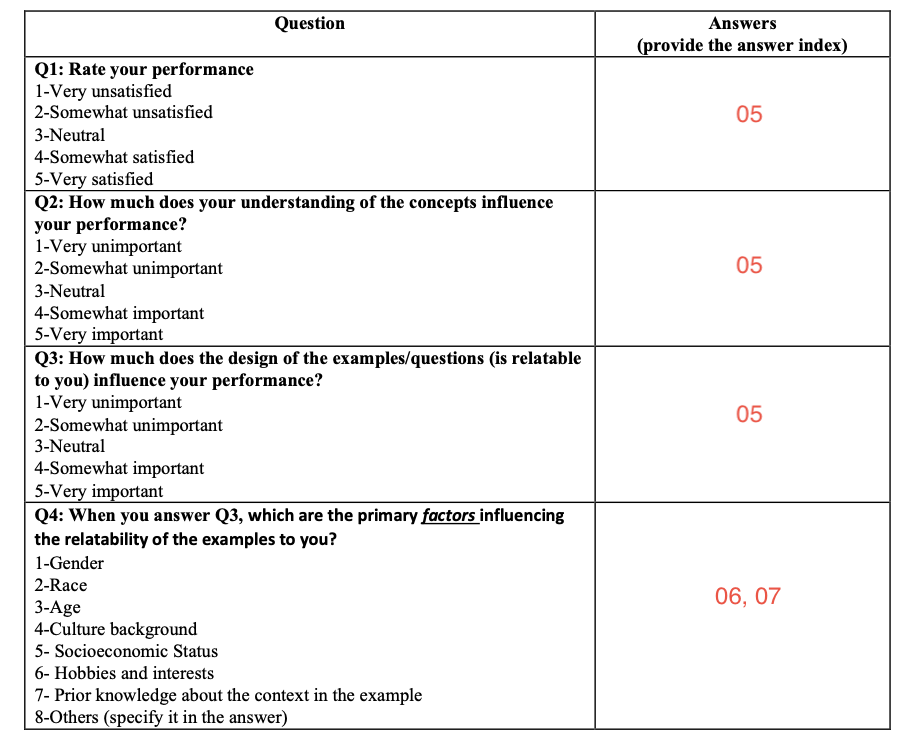

**REFERENCE:**

[1] Muennighoff, N. (n.d.). flores200 dataset. Hugging Face. Retrieved from https://huggingface.co/datasets/Muennighoff/flores200

[2] Xue, L., Constant, N., Roberts, A., et al. (2020). mT5: A massively multilingual pre-trained text-to-text transformer. arXiv. Retrieved from https://arxiv.org/abs/2008.00401

[3] BLEU metric for machine translation evaluation. Hugging Face. Retrieved from https://huggingface.co/spaces/evaluate-metric/bleu

[4] Facebook AI. (n.d.). mbart-large-50 model. Hugging Face. Retrieved from https://huggingface.co/facebook/mbart-large-50

[5] Lewis, M., Liu, Y., Goyal, N., et al. (2020). BART: Denoising sequence-to-sequence pre-training for natural language generation, translation, and comprehension. arXiv. Retrieved from https://arxiv.org/abs/2010.11125

[6] CTranslate2 library. OpenNMT. Retrieved from https://github.com/OpenNMT/CTranslate2

[7] MarianMTModel documentation. Hugging Face. Retrieved from https://huggingface.co/docs/transformers/main/en/model_doc/marian#transformers.MarianMTModel